# Principal Component Analysis

This notebook demonstrates how to use the `PCA` module from the `rice2025.unsupervised_learning` library.  

## Setup
Import necessary modules and load data. For this example, we will import the Breast Cancer dataset.

The Breast Cancer dataset contains measurements of cell nuclei computed from digitized images of breast mass biopsies.

- Samples: 569 observations
- Features: 30 continuous numerical features
- Labels: Benign (0) or Malignant (1)

In [6]:
# import library
from rice2025.unsupervised_learning import pca
import numpy as np
import matplotlib.pyplot as plt

# load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
print(f"Data shape: {X.shape}")

Data shape: (569, 30)


## Standardize the Data
PCA is sensitive to feature scale, so we standardize the data before applying PCA.

In [7]:
from rice2025.utilities import normalize
X_norm = normalize(X)

## Initialize and Fit PCA Model

We use the `PCA` class to perform dimensionality reduction by projecting data onto directions of maximum variance. The class supports the following parameters:
- `n_components`: The number of principal components to retain.

In [16]:
# initialize model
model = pca.PCA(n_components=2)

# fit
_ = model.fit(X_norm)

## Transform Data

We call the transform funciton on the fitted data to obtain our final result. 

In [14]:
X_pca = model.transform(X_norm)
print(f"PCA transformed shape: {X_pca.shape}")

PCA transformed shape: (569, 2)


## Visualize PCA Projection
Each point is colored according to its class label.

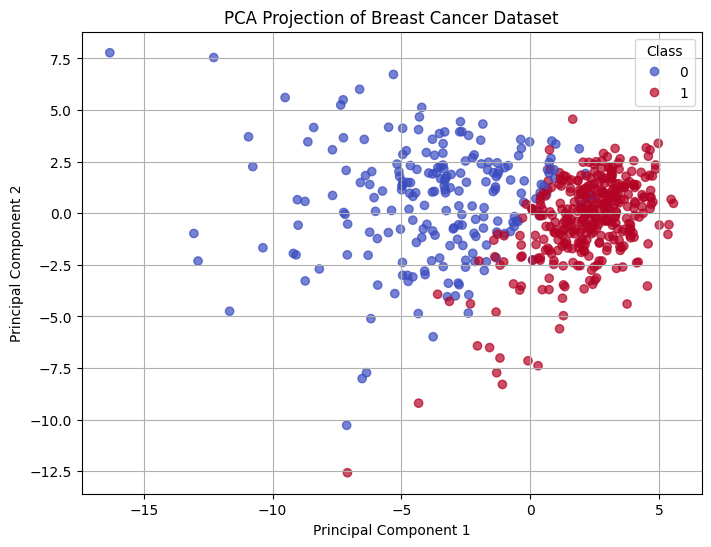

In [17]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    cmap="coolwarm",
    alpha=0.7
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Breast Cancer Dataset")
plt.legend(*scatter.legend_elements(), title="Class")
plt.grid(True)
plt.show()